In [18]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from pmlb import fetch_data

from asboostreg import SparseAdditiveBoostingRegressor

In [19]:
shap.initjs()

In [20]:
data = fetch_data("197_cpu_act")
X = data.drop("target", axis=1)
y = data["target"]
# drop constant columns
X = X.loc[:, X.apply(pd.Series.nunique) != 1]

In [21]:
params = {
    "n_estimators": 320,
    "learning_rate": 0.3,
    "row_subsample": 0.7,
    "max_bins": 512,
    "l2_regularization": 0.6,
    "min_samples_leaf": 8,
    "max_leaves": 32,
    "redundancy_exponent": 1.0,
    "random_state": 0,
}
model = SparseAdditiveBoostingRegressor(**params)
model.fit(X, y)

SparseAdditiveBoostingRegressor(n_estimators=249, learning_rate=0.3, dropout=False, dropout_rate=0.25, dropout_probability=0.1, random_state=0, row_subsample=0.7, subsample_type='mini-batch', validation_fraction=0.1, n_iter_no_change=10, fill_value=10000.0, max_bins=512, l2_regularization=0.6, min_l0_fused_regularization=0.0, max_l0_fused_regularization=100.0, min_samples_leaf=8, max_leaves=32, relevancy_scorer=<function f_regression_score at 0x000001C3FF1B9940>, redundancy_matrix=<function absolute_correlation_matrix at 0x000001C3FF1B9A80>, mrmr_scheme=<function safe_divide at 0x000001C3FF1CA7A0>, redundancy_exponent=1.0, categorical_features=[], output_name='target', feature_names_in_=array(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch',
       'pgin', 'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype=object))

In [22]:
X_sample = X.sample(500, random_state=0)
X_arr = np.ascontiguousarray(model.preprocessor_.transform(X_sample))
contribution = np.array(
    [
        regressor.predict(X_arr[:, i])
        for i, regressor in enumerate(model.regressors_)
    ]
).T
contribution_df = pd.DataFrame(
    contribution, columns=model.feature_names_in_
)

In [23]:
explanation = shap.Explanation(
    values=contribution_df.values,
    base_values=model.intercept_,
    data=X_sample,
    feature_names=model.feature_names_in_,
)

In [35]:
shap.force_plot(
    model.intercept_,
    contribution_df.values,
    X,
    link="identity",
)

<Figure size 640x480 with 0 Axes>

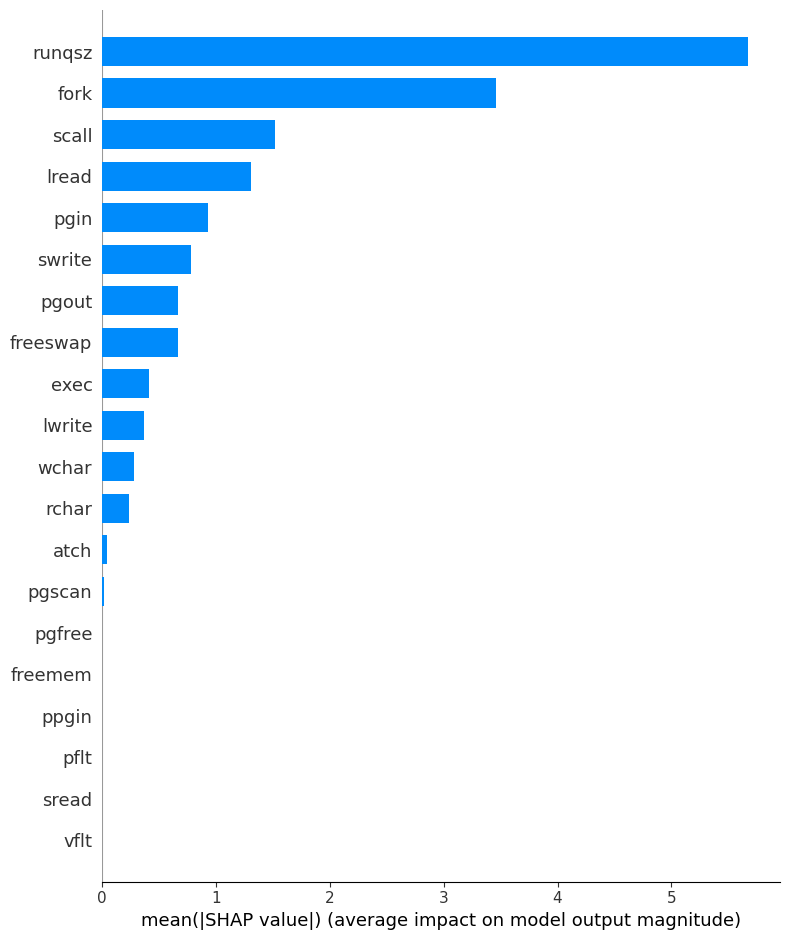

In [29]:
fig = shap.summary_plot(
    explanation,
    X,
    plot_type="bar",
    max_display=20,
    show=False,
)
plt.savefig("summary.png")

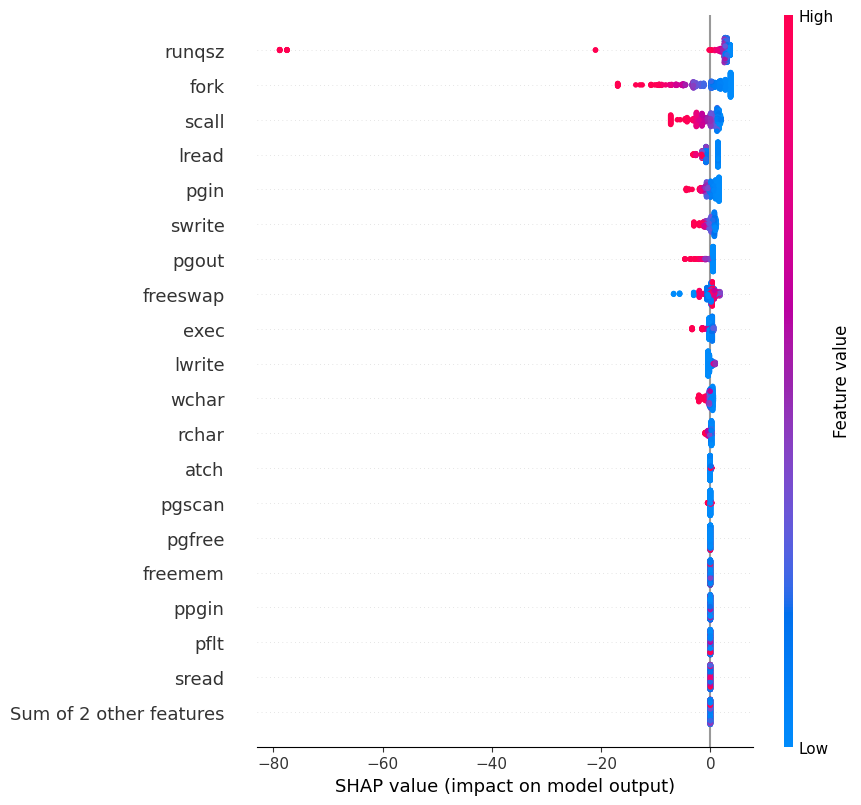

In [32]:
fig = shap.plots.beeswarm(
    explanation,
    max_display=20,
    show=False,
)
plt.savefig("beeswarm.png")

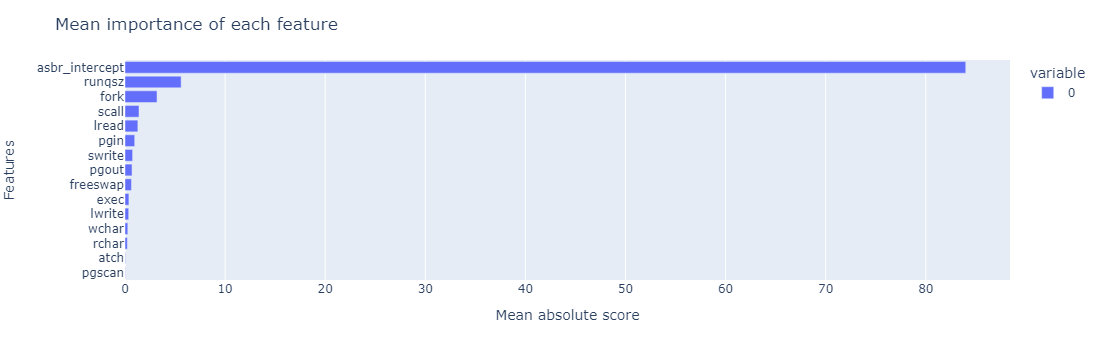

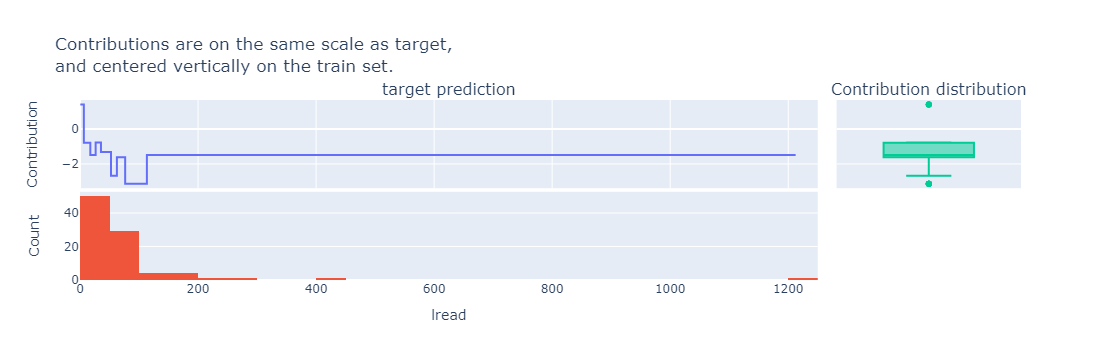

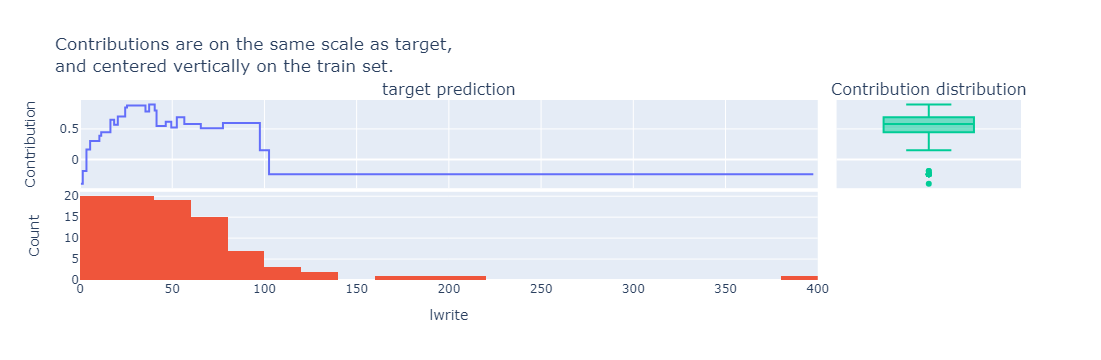

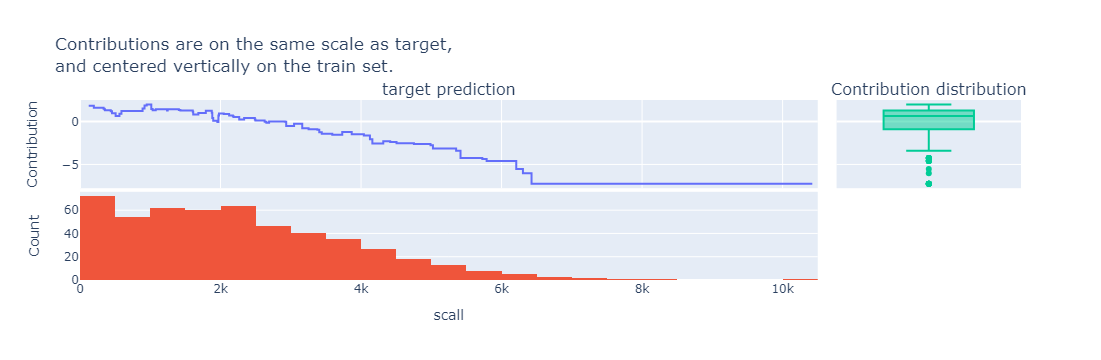

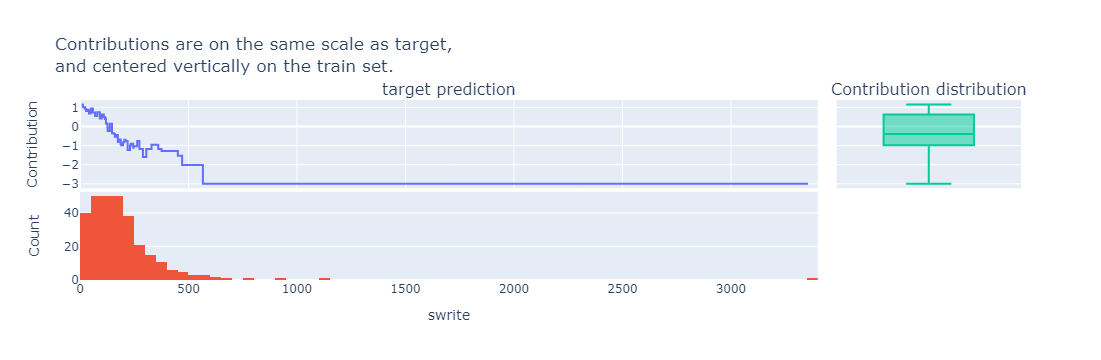

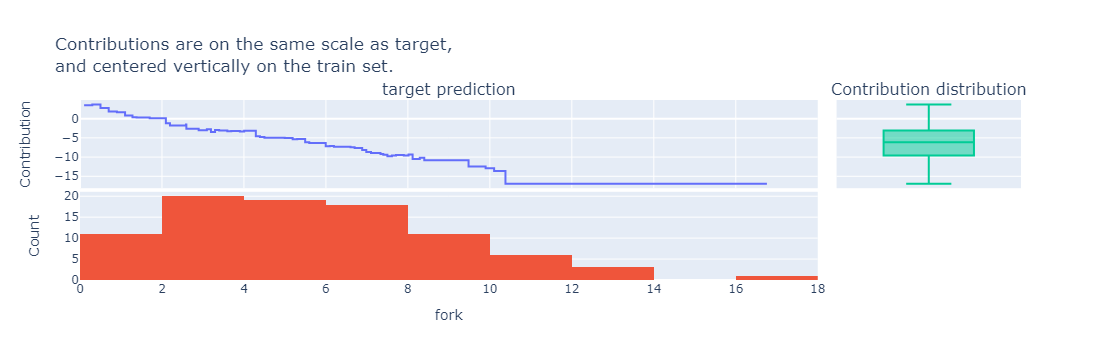

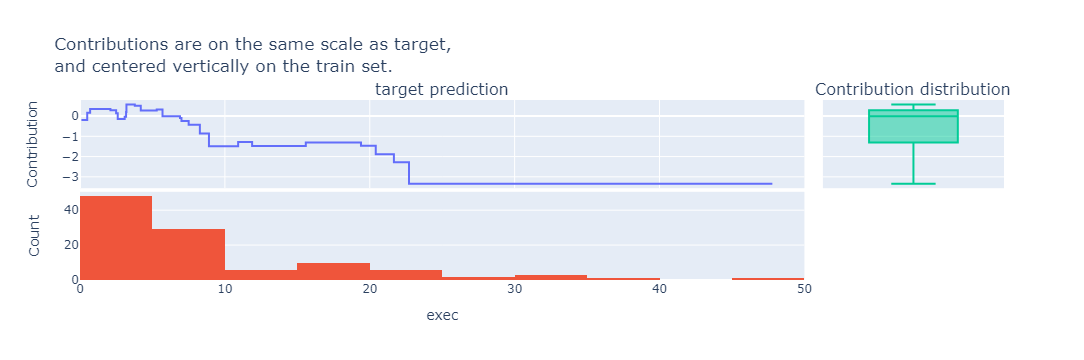

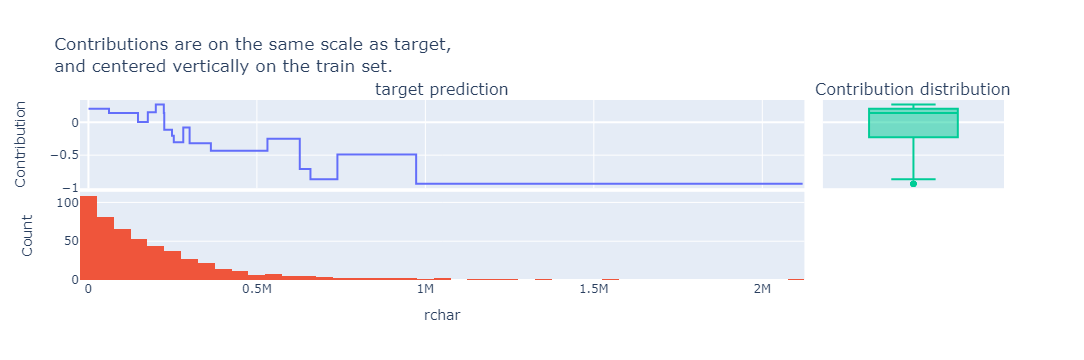

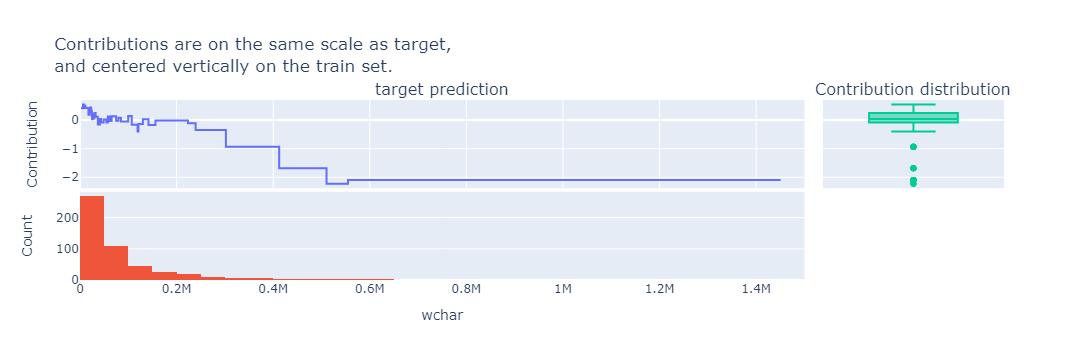

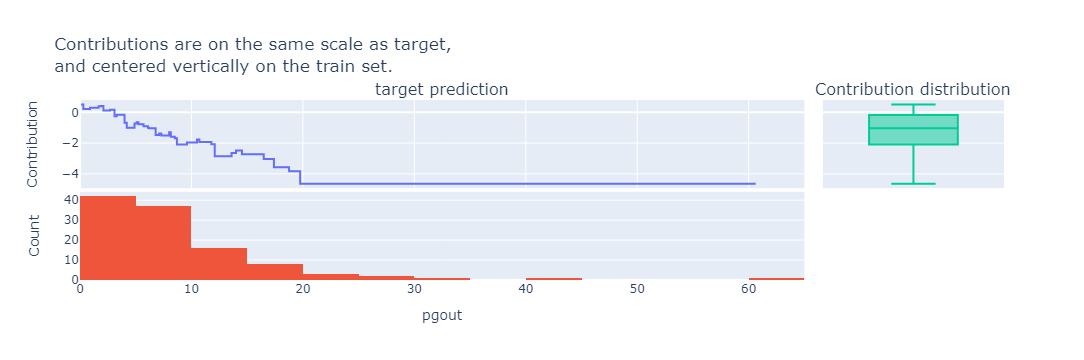

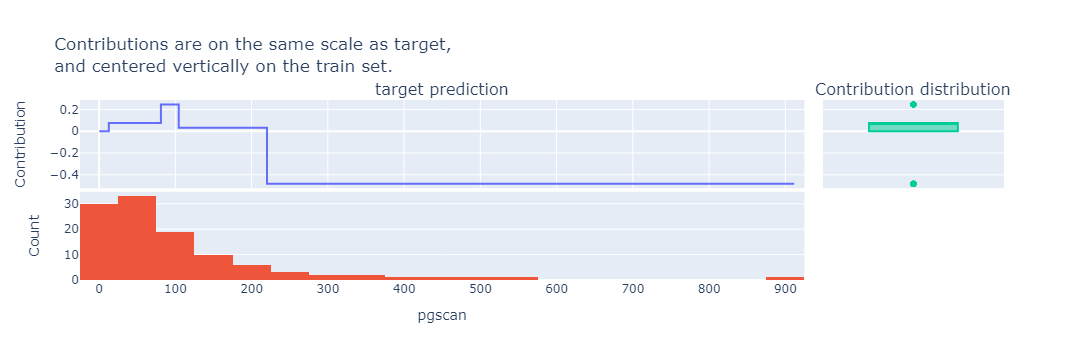

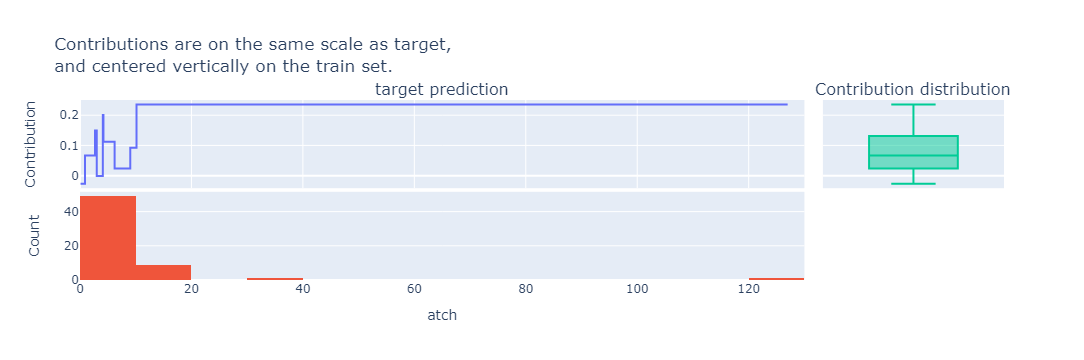

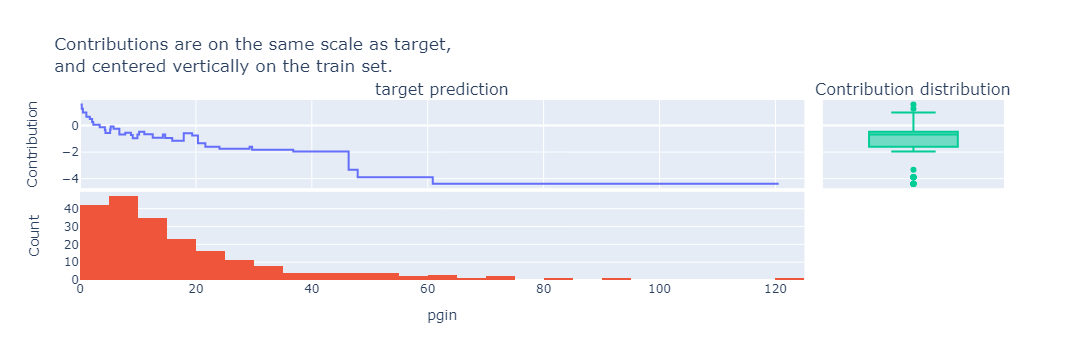

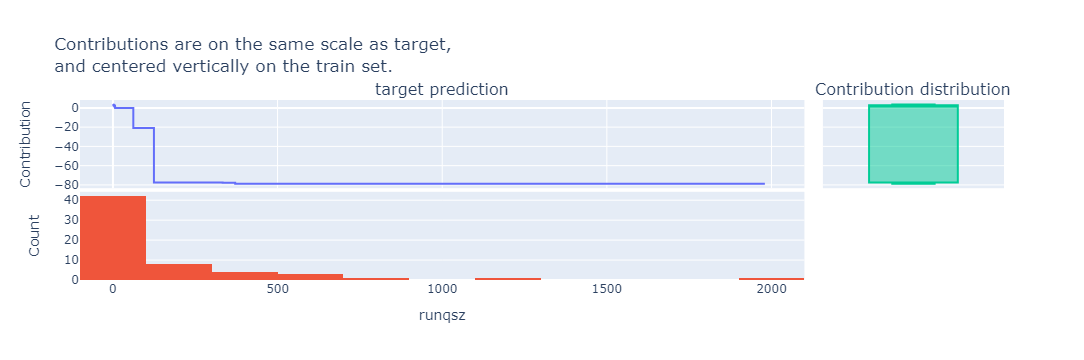

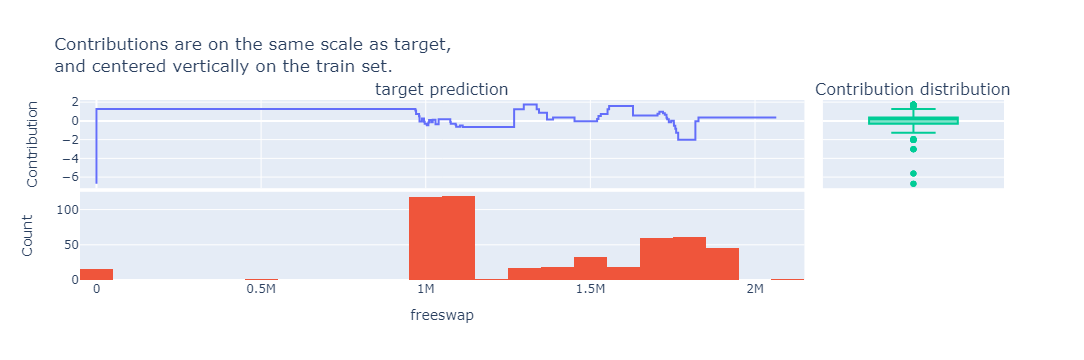

In [10]:
model.explain(X)